In [3]:
import numpy as np

import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression


# Create a synthetic dataset to experiment with linear regression
ds = datasets.make_regression(10, 2, noise=30)
print(ds[0]) # les données en X 
print(ds[1]) # le y qui leur correspond

[[-0.80887952  2.61942614]
 [-0.1131877  -0.42341997]
 [ 0.03886303 -1.17841309]
 [-0.02362653  0.12641386]
 [ 0.51841878  1.81031443]
 [ 1.0103509  -0.59631644]
 [-0.7340047   1.3671624 ]
 [ 1.24433424  0.08222514]
 [-1.29219908  2.30556134]
 [-1.08695466 -0.27282131]]
[ 148.21079859   15.47267487  -88.12303213   48.1792767   127.99772215
   26.21028112   49.90121668  107.64789905   43.01768736 -124.78128723]


In [4]:
import sklearn.model_selection as model_selection

# divide this dataset in a training set and un testing set (see sklearn train_test_split)
haha = model_selection.train_test_split(ds[0], ds[1], test_size=0.5)

# train test split peut prendre plus de 2 tables en entrée, et retournera alors sous la forme :
# x1, x2, y1, y2, z1, z2 = train_test_split(x, y, z)

# sous forme de dictionnaire
ds_split = {
    'x train' : haha[0],
    'x test' : haha[1],
    'y train' : haha[2],
    'y test' : haha[3],
}
for k,v in ds_split.items() : print(f'{k} : \n{v}')

# sous forme de deux variables
ds_train = [haha[0], haha[2]]
ds_test = [haha[1], haha[3]]

print(ds_train)


x train : 
[[ 0.03886303 -1.17841309]
 [ 0.51841878  1.81031443]
 [ 1.0103509  -0.59631644]
 [-0.7340047   1.3671624 ]
 [-0.02362653  0.12641386]]
x test : 
[[-1.29219908  2.30556134]
 [-0.80887952  2.61942614]
 [ 1.24433424  0.08222514]
 [-1.08695466 -0.27282131]
 [-0.1131877  -0.42341997]]
y train : 
[-88.12303213 127.99772215  26.21028112  49.90121668  48.1792767 ]
y test : 
[  43.01768736  148.21079859  107.64789905 -124.78128723   15.47267487]
[array([[ 0.03886303, -1.17841309],
       [ 0.51841878,  1.81031443],
       [ 1.0103509 , -0.59631644],
       [-0.7340047 ,  1.3671624 ],
       [-0.02362653,  0.12641386]]), array([-88.12303213, 127.99772215,  26.21028112,  49.90121668,
        48.1792767 ])]


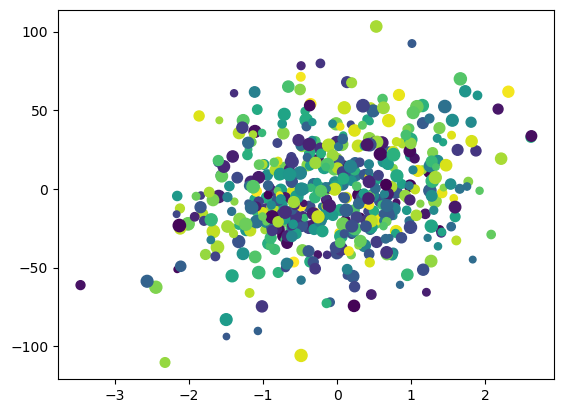

In [5]:
import matplotlib.pyplot as plt

# Visualize data.
# On est obligés d’avoir le même nombre de dimensions
# re-generation d’un ds
ds2 = datasets.make_regression(500, 1, noise=30)
ds2 = {'x':ds2[0],'y':ds2[1]}

size = np.random.uniform(20,80,len(ds2['x']))
color = np.random.uniform(20,200,len(ds2['x']))

plt.scatter(ds2['x'], ds2['y'], c=color, s=size)
plt.draw()

# re-split les données
datasplit = model_selection.train_test_split(ds2['x'], ds2['y'], test_size=0.5)
dtrain = {'x':datasplit[0],'y':datasplit[2]}
dtest = {'x':datasplit[1],'y':datasplit[3]}

# print(dtest)


In [6]:
# train your model to fit a linear regression model

X = dtrain['x']
y = dtrain['y']
reg = LinearRegression()
reg.fit(X, y)
print(reg.score(X,y))

0.0840370234932456


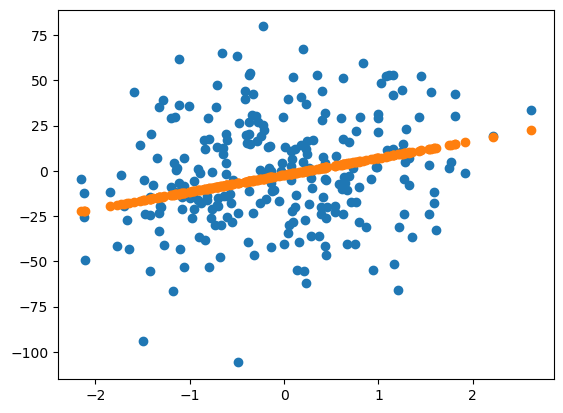

In [7]:
# predict data on your test set
X2 = dtest['x']
prediction = reg.predict(X2)
# print(prediction)

# Visualize the result
plt.plot(X2, dtest['y'], 'o')
plt.plot(X2, prediction, 'o')


In [8]:
from sklearn.metrics import mean_squared_error
import math

# Calculer le score RMSE Root Mean Square Error
# Carré de la Somme de la moyenne des Erreurs au carré

mse = mean_squared_error(dtest['y'], prediction)
print('RMSE:',mse)
print('RMSE:',math.sqrt(mse))

# Calcul à la main (enfin avec numpy)
err = np.sqrt(np.mean((dtest['y'] - prediction)**2))
print(err)

RMSE: 908.207236043547
RMSE: 30.13647683528297
30.13647683528297


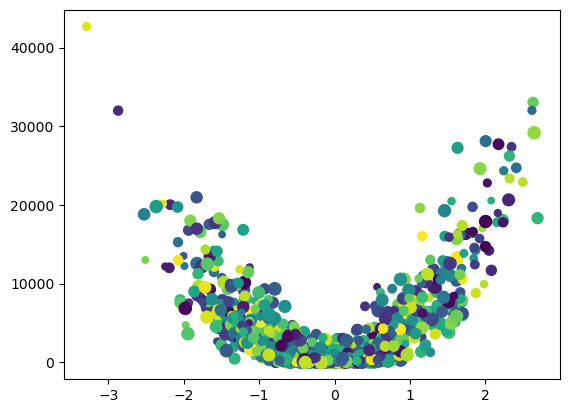

In [45]:
# maintenant on essaye de générer des données qui suivent une courbe,
# some fckng QUADRATIC DISTORTION 😱😱

dsq = datasets.make_regression(1000, 1, noise=30)
dsq = {'x':dsq[0],'y':dsq[1]}
dsq['y'] = (8 * dsq['y']) + (0.5 * dsq['y']**2)

size = np.random.uniform(20,80,len(dsq['x']))
color = np.random.uniform(20,80,len(dsq['x']))

plt.scatter(dsq['x'], dsq['y'], c=color, s=size)
plt.draw()

# re-split les données
datasplit = model_selection.train_test_split(dsq['x'], dsq['y'], test_size=0.5)
dtrain = {'x':datasplit[0],'y':datasplit[2]}
dtest = {'x':datasplit[1],'y':datasplit[3]}


In [46]:
# fit and predict again. What do you observe ?

# essai de le faire à la main, mais il manque une première colonne avec des 1 au début de
# chaque élément (et en plus c’est lent)
# X = [[x[0], x[0]**2] for x in dtrain['x']]
# X = np.array(X)

# transformation des valeurs de x en polynome afin que fit puisse générer des 
# prédiction plus séduisantes
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
Xpoly = poly.fit_transform(dtrain['x'])
print(Xpoly[:5])

y = dtrain['y']
model = LinearRegression()
model.fit(Xpoly, y)
print(model.score(Xpoly,y))

[[ 1.          0.37869296  0.14340836]
 [ 1.         -0.31531231  0.09942185]
 [ 1.         -1.13187389  1.28113849]
 [ 1.          0.45933225  0.21098611]
 [ 1.          1.15281452  1.32898133]]
0.7213241470450696


[341 216 162 410 151 362 306   9 197 484  96 454 367  32 141 275 492  43
 307 194 463 117 446 186 261 203  67 420 218  47   5  42 345 391 460 232
  48 193 321 137  60 284  94  33 171 207  68  25 497 280  51 385 210 303
 449 170 322  76  28  73  44  65 128 370 181 144 291 246  13  16  77 379
 191  10 169  88 442 293 233 286  74 494 148 245 158  93 347 209 161 475
 295  69 122 409 231 433 249 351 175 176 297 206 155 342 426 340 466 350
 462  21 471 496 302 196 224  91  19 386 123 298 281  12 235 310   8 450
 414 368 495 244 138  95 465 485 443 187 335 468 279 124 288 147 108 256
 325 357  83 326  66 399  52 396  57 469 435  56 223 374 179 248 278 311
 328 320 184 451  46 277 125 104 271 487 287 371 252 142 102 135  34 408
 301 251 318 490 198 259 401  75 331 145 195 168 230 390 470 441 498  63
 215  55 221   7 260 200 180 116 422  92 424 314  22 363 418   3 346 243
 199 211 182  26 407  87 192 239 110 437 313 474  24  36  38 272 240 392
 483 365  79 120 130 430 421  97  31   6 429 201 42

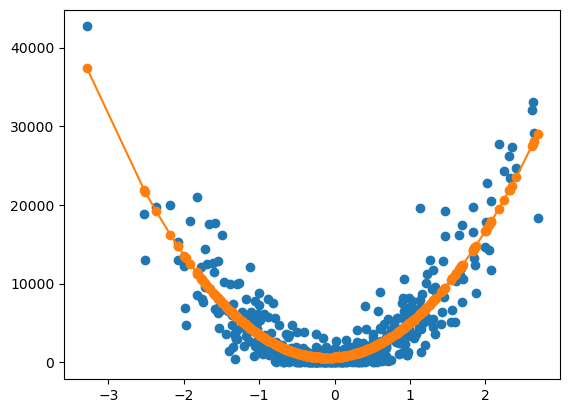

In [51]:
# predict data on your test set
# X2 = [[x[0], x[0]**2] for x in dtest['x']]
X2poly = poly.fit_transform(dtest['x'])
prediction = model.predict(X2poly)

# pour que les données soient dans le bon ordre (affichage des traits par pyplot): 
sort_indices = np.argsort(dtest['x'].T[0])
# print(sort_indices)

# Visualize the result
# syntaxe numpy : array[list d’indice] : reorganise les valeurs en fonction de la 
# liste d’indices
plt.plot(dtest['x'][sort_indices], dtest['y'][sort_indices], 'o')
prediction = prediction
plt.plot(dtest['x'][sort_indices], prediction[sort_indices], 'o-')